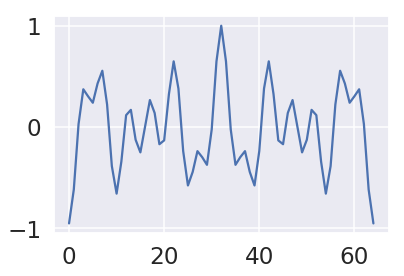

In [4]:
                                                                                                                                                                                                        import numpy as np
import matplotlib.pyplot as plt

def koreluj(s1, s2, Fs): #delta - ile przesunięć
    delta = int(Fs/2)
    gammy = np.zeros(2*delta+1)
    N = len(s1)
    for i in range(-delta, delta+1):
        if i < 0:
            s1_temp=s1[0:N+i]
            s2_temp=s2[-i:N]
        else:
            s1_temp=s1[i:N]
            s2_temp=s2[0:N-i]
        gamma = np.sum((s1_temp - np.mean(s1)) *(s2_temp - np.mean(s2)))/(N-1)
        gamma = gamma / (np.std(s1,ddof=1)*np.std(s2,ddof=1))
        gammy[delta+i] = gamma
    return gammy
    
def fourier(kor, F):
    s = np.zeros(len(F),dtype=complex)
    for i,f in enumerate(F):
        a=0
        for tau, gamma in enumerate(kor):
            t = int(tau-len(kor)/2)/Fs
            a += gamma*np.exp(-2*np.pi*1j*f*t)
        s[i] = np.absolute(a)
    return s

Fs = 64
t = np.arange(0,10,1/Fs)
s = np.sin(2*np.pi*t*5) + np.sin(2*np.pi*t*7) + np.sin(2*np.pi*t*13) 
#with plik as open(\\home\desktop\eeg\mateusz_oczy_szeroko_zamkniete.raw):
    

czestosci = np.arange(0,Fs/2, 0.01)
kor = koreluj(s,s,Fs)
plt.plot(kor)
plt.show()
# plt.plot(czestosci, fourier(kor, czestosci), color = "green")

In [6]:
!pip3 install 'saffy==0.1' --force-reinstall --user

  Using cached https://files.pythonhosted.org/packages/10/d8/aefac9fdbd0336d5a5d303ef45c9e7e6751455f89cac506c601ced1447bb/Saffy-0.1.tar.gz
    Complete output from command python setup.py egg_info:
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "/tmp/pip-install-ivpx3ggn/saffy/setup.py", line 3, in <module>
        with open('requirements.txt', 'r') as reqs:
    FileNotFoundError: [Errno 2] No such file or directory: 'requirements.txt'
    
    ----------------------------------------
Command "python setup.py egg_info" failed with error code 1 in /tmp/pip-install-ivpx3ggn/saffy/
You are using pip version 19.0.3, however version 19.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import saffy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

2019-10-17 14:17:03,293 - data_source - INFO - All data set requested for the first time. Start reading all data from the file...


Fs; 256
(9, 79088)
(7, 79088)


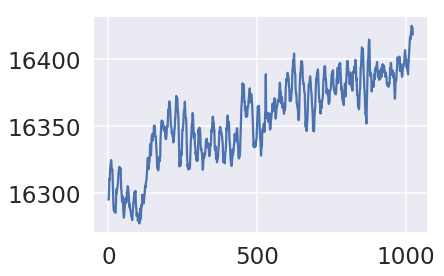

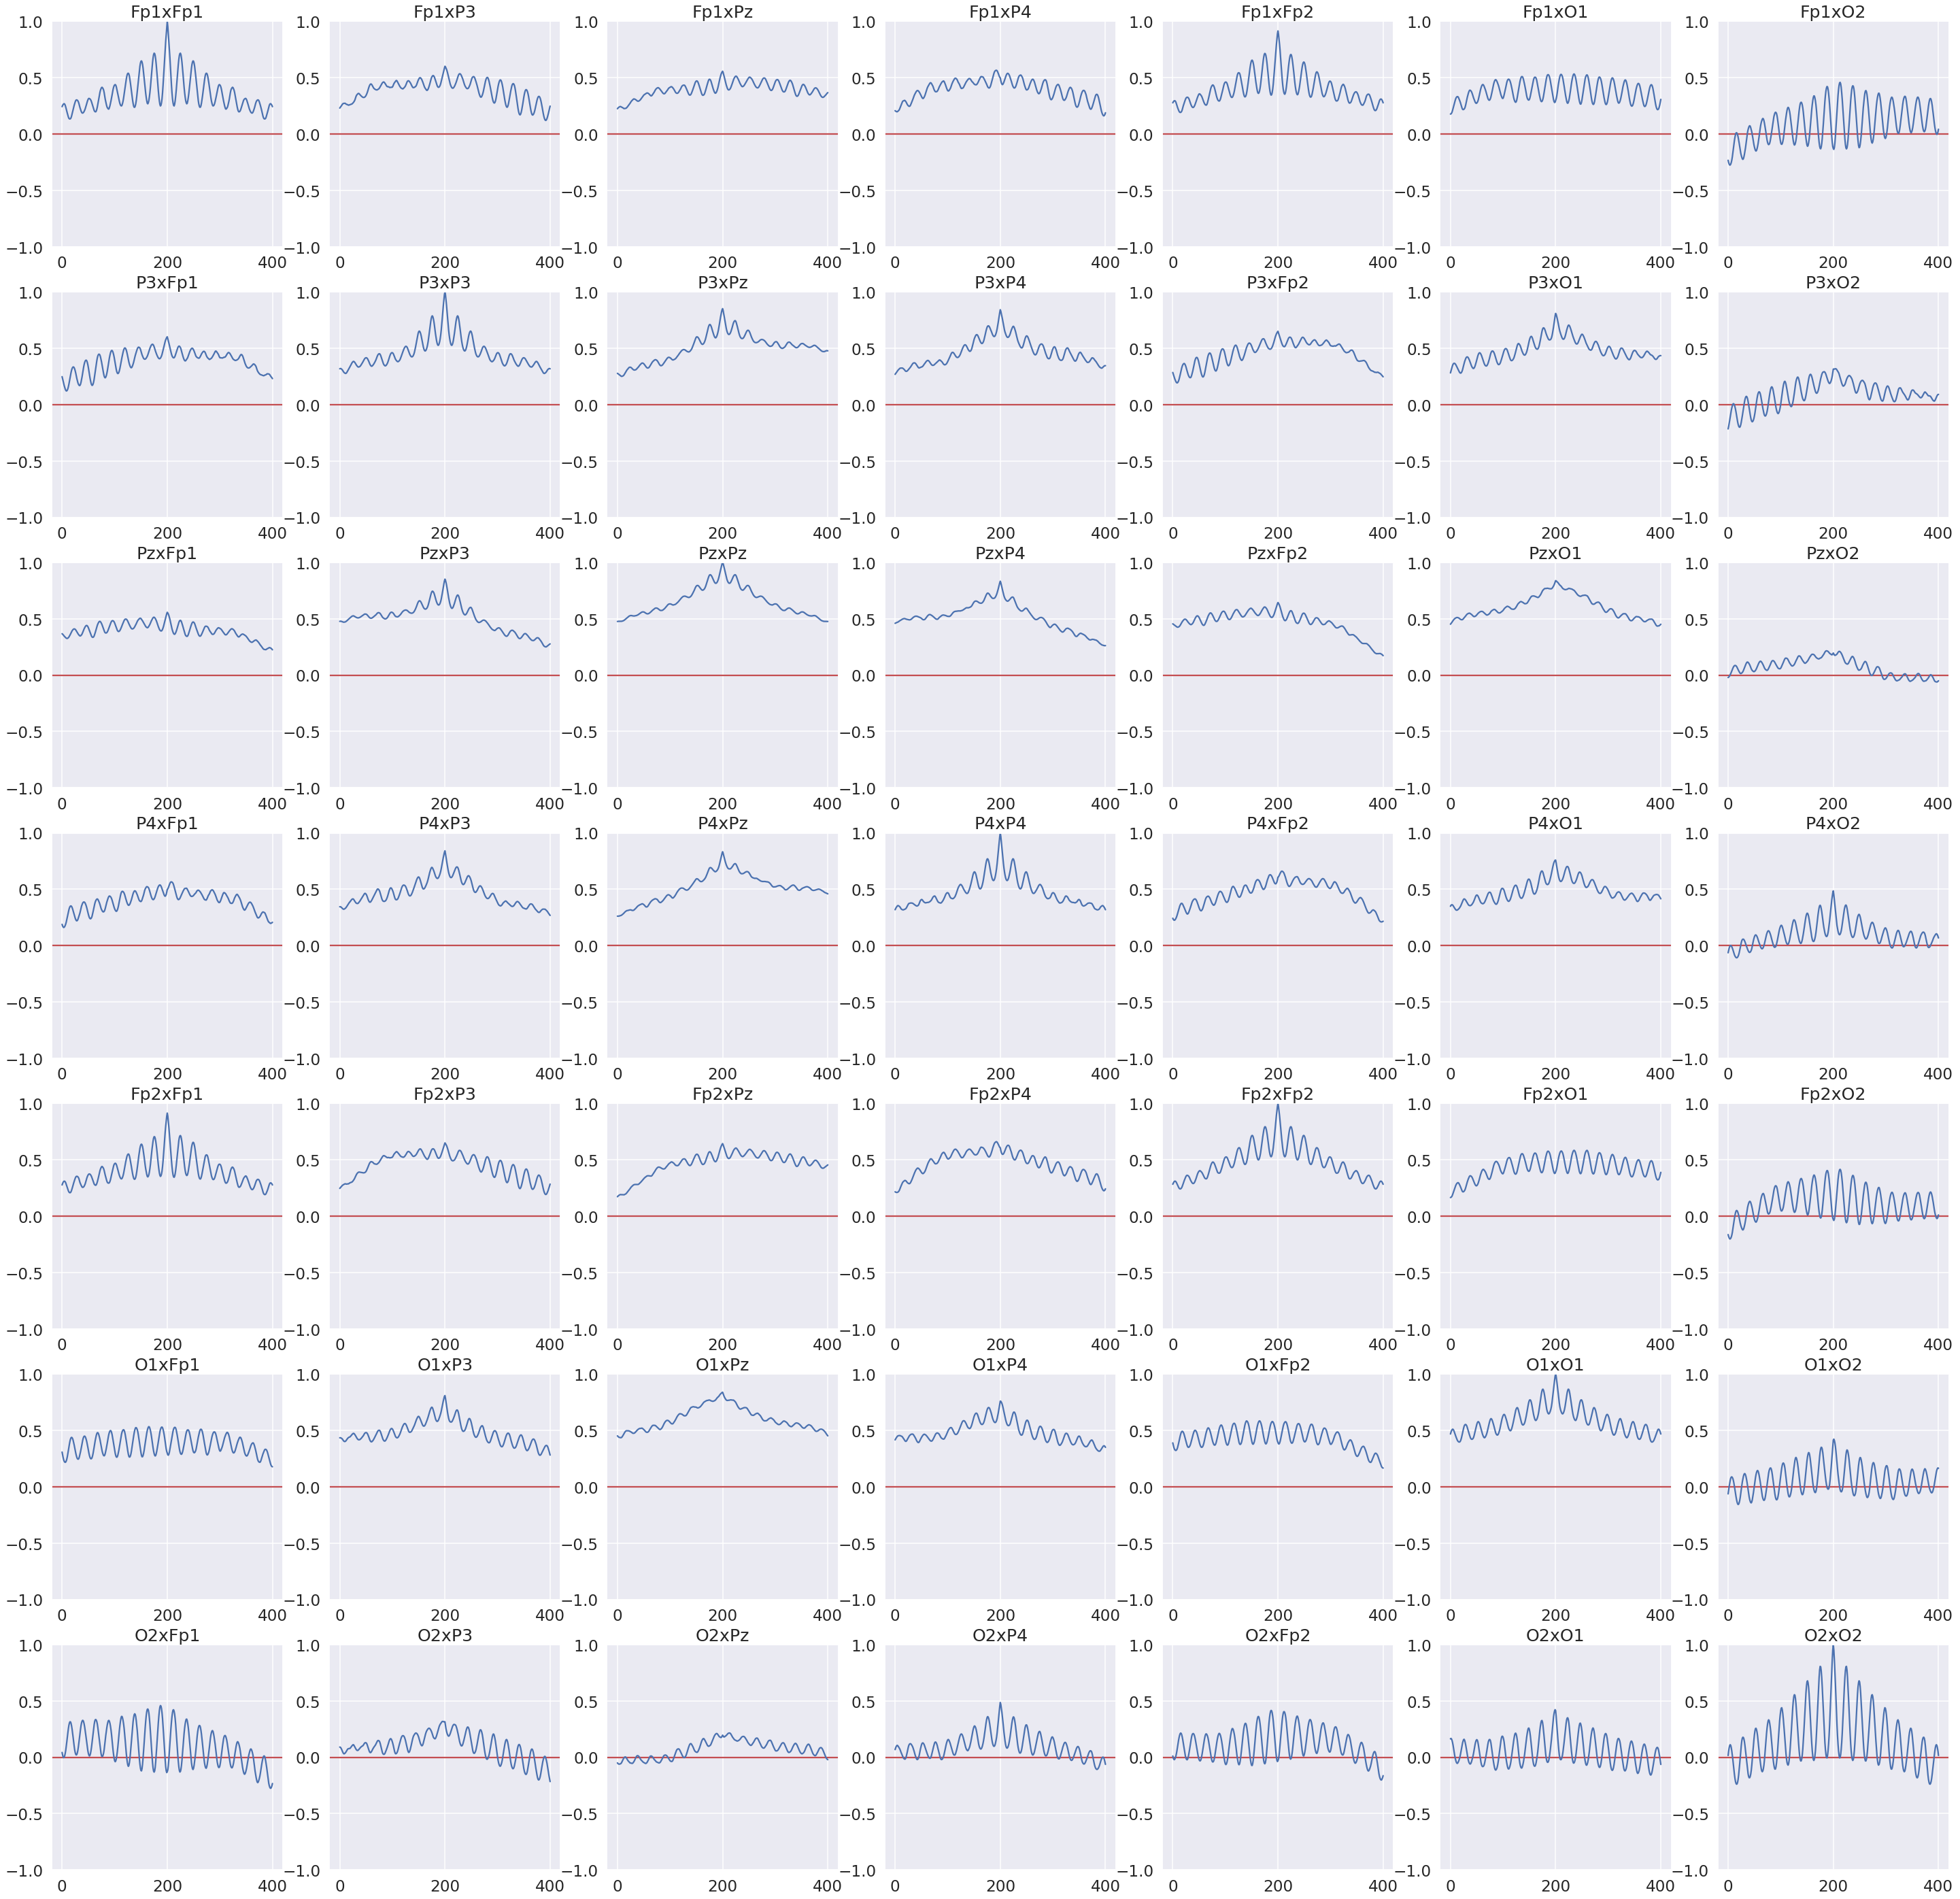

In [15]:
pliki = {'open':'mateusz_oczy_szeroko_zamkniete', 'closed':'mateusz_oczy_zamkniete', 'inne':'mateusz_try1'}
EEG = saffy.SignalManager(filename=pliki['closed'])
EEG.data = np.reshape(EEG.data, (1, *EEG.data.shape))
CH = ['Fp1', 'P3', 'Pz', 'P4', 'Fp2', 'O1', 'O2', 'A1','A2']
EEG.extract_channels(CH)
print('Fs;',EEG.fs)
EEG_2D = EEG.data[0,:,:]
for k in range(EEG_2D.shape[0]): 
    EEG_2D[k,:] = EEG_2D[k,:] - (EEG_2D[-1,:] + EEG_2D[-2,:])/2  #montaz, odejmujemy A1 czyli ucho
print(EEG_2D.data.shape)
EEG_2D = EEG_2D[0:-2,:]
print(EEG_2D.data.shape)
plt.plot(EEG_2D[0,:1024])
plt.show()



In [ ]:
N = 400
start = 1000
stop = 2500
KORELACJE = np.empty((EEG_2D.shape[0],EEG_2D.shape[0],N+1))
fig = plt.figure(figsize = (50,50))
for i in range(EEG_2D.shape[0]):
    for j in range(EEG_2D.shape[0]):
        KORELACJE[i,j,:] = koreluj(EEG_2D[i,start:stop] , EEG_2D[j,start:stop] , N)
        ax1 = plt.subplot(EEG_2D.shape[0], EEG_2D.shape[0], (i*EEG_2D.shape[0])+j+1)
        plt.title(CH[i] + 'x' + CH[j])
        plt.axhline(0, color = 'r')
        plt.ylim(-1,1)
        ax1.plot(KORELACJE[i,j])
plt.show()


In [91]:
import scipy.signal as ss
N = 400
start = 1000
stop = 2500
KORELACJE = np.empty((EEG_2D.shape[0],EEG_2D.shape[0],N+1))
fig = plt.figure(figsize = (50,50))
max_corr = np.zeros(1000)
for k in range(2):
    corr_matrix = np.zeros((EEG_2D.shape[0]**2,2 * (stop-start) -1))
#     corr_matrix = np.zeros((EEG_2D.shape[0]**2,N+1))
    for i in range(EEG_2D.shape[0]):
        for j in range(EEG_2D.shape[0]):
            syg1 = (EEG_2D[i,start:stop] - np.mean(EEG_2D[i,start:stop]))/( np.std(EEG_2D[i,start:stop]) * len(EEG_2D[i,start:stop]) )
#             syg1 = syg1/np.linalg.norm(syg1)
            np.random.shuffle(syg1)
            syg2 = (EEG_2D[j,start:stop] - np.mean(EEG_2D[j,start:stop]))/( np.std(EEG_2D[j,start:stop]) )
#             syg2 = syg2/np.linalg.norm(syg2)
            np.random.shuffle(syg2)
            if i == j:
#                 corr_matrix[(i*EEG_2D.shape[0])+j,:] = koreluj(syg1 , syg2 , N)
                corr_matrix[(i*EEG_2D.shape[0])+j,:] = ss.correlate(syg1 , syg2, 'full')#/(np.std(syg1,ddof=1)*np.std(syg2,ddof=1))
#                 corr_matrix[(i*EEG_2D.shape[0])+j,int(N/2)] = 0
                print(corr_matrix[(i*EEG_2D.shape[0])+j,(stop-start)-2:(stop-start)+2])
#                 corr_matrix[(i*EEG_2D.shape[0])+j,(stop-start)-1:(stop-start)+2] = 0
#                 print(corr_matrix[(i*EEG_2D.shape[0])+j,(stop-start)-1:(stop-start)+1])
            else:
#                 corr_matrix[(i*EEG_2D.shape[0])+j,:] = koreluj(syg1 , syg2 , N)
                corr_matrix[(i*EEG_2D.shape[0])+j,:] = ss.correlate(syg1 , syg2 , 'full')#/(np.std(syg1,ddof=1)*np.std(syg2,ddof=1))
#             plt.plot(corr_matrix[(i*EEG_2D.shape[0])+j,:])
#             plt.show()
#             print(corr_matrix[(i*EEG_2D.shape[0])+j,:])
    max_corr[k] = np.max(np.abs(corr_matrix))
print(max_corr)

[-0.00022709 -0.00157244  0.00031296]
[-4.11140985e-04 -1.25254599e-04  5.25357970e-05]
[-2.54694617e-03 -6.95051150e-04 -4.08391184e-05]
[0.00044857 0.00020384 0.00090586]
[-1.23681476e-05 -1.30470097e-03  2.32824683e-04]
[ 0.00092567 -0.00053591  0.00072187]
[-0.00030562 -0.00016461  0.00024452]
[ 0.00010374  0.00066469 -0.00021091]
[ 5.14305485e-04 -1.35736804e-04 -2.19477628e-05]
[0.00159564 0.0010612  0.00018104]
[3.76536434e-04 2.28665971e-04 1.78540928e-05]
[ 4.84112911e-05 -9.95715527e-04  1.85613352e-04]
[-0.00115813 -0.00147217 -0.0009363 ]
[-0.00043455 -0.00115385  0.00095503]
[0.09980453 0.1100145  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.    

<Figure size 3600x3600 with 0 Axes>

In [92]:
import scipy.signal as ss
N = 400
start = 1000
stop = 2500
KORELACJE = np.empty((EEG_2D.shape[0],EEG_2D.shape[0],N+1))
fig = plt.figure(figsize = (50,50))
max_corr = np.zeros(1000)
for k in range(1000):
#     corr_matrix = np.zeros((EEG_2D.shape[0]**2,2 * (stop-start) -1))
    corr_matrix = np.zeros((EEG_2D.shape[0]**2,N+1))
    for i in range(EEG_2D.shape[0]):
        for j in range(EEG_2D.shape[0]):
            syg1 = EEG_2D[i,start:stop]
            np.random.shuffle(syg1)
            syg2 = EEG_2D[j,start:stop]
            np.random.shuffle(syg2)
            if i == j:
                corr_matrix[(i*EEG_2D.shape[0])+j,:] = koreluj(syg1 , syg2 , N)
                corr_matrix[(i*EEG_2D.shape[0])+j,int(N/2)] = 0
#                 print(corr_matrix[(i*EEG_2D.shape[0])+j,int(N/2)-2:int(N/2)+2])
            else:
                corr_matrix[(i*EEG_2D.shape[0])+j,:] = koreluj(syg1 , syg2 , N)
    max_corr[k] = np.max(np.abs(corr_matrix))
print(max_corr)

[0.11058331 0.09612861 0.11659569 0.09183809 0.09320125 0.118416
 0.09659674 0.10765766 0.11030518 0.09663574 0.10057605 0.11260277
 0.10711771 0.12150261 0.09942373 0.09361587 0.12105772 0.10601487
 0.11021211 0.10177531 0.10959082 0.10339246 0.10313911 0.10387378
 0.09999384 0.11459127 0.10670399 0.09976625 0.10285201 0.11669776
 0.09576262 0.10564284 0.10556427 0.09248552 0.10612832 0.10061203
 0.10187859 0.1043992  0.10495018 0.10324941 0.09461212 0.10284832
 0.10080093 0.09951408 0.09726278 0.09425441 0.09705749 0.10916366
 0.09718959 0.09330548 0.09554773 0.10871541 0.10241573 0.10057303
 0.09347302 0.10259566 0.09394169 0.09967007 0.09236641 0.10717451
 0.10092418 0.1133436  0.09797939 0.09463051 0.09276296 0.10568382
 0.10623963 0.1039647  0.09897215 0.10154367 0.09943159 0.10006825
 0.1103227  0.09466045 0.10527064 0.09308292 0.09494583 0.11144029
 0.11279137 0.10619889 0.10617898 0.0918117  0.12056782 0.10106226
 0.10793448 0.11879791 0.09265027 0.09726815 0.10208579 0.101900

<Figure size 3600x3600 with 0 Axes>